# Testing out data augmentations for better performance

In [1]:
from datasets import Dataset, DatasetDict, load_from_disk
import pandas as pd
import numpy as np
random_state = 1234
import matplotlib.pyplot as plt
import os

In [2]:
dataset = load_from_disk("./datasets/cleaned_hf/merged_hf")

In [3]:
train_df = dataset['train'].to_pandas()

In [4]:
train_df

,text,labels
0,My favourite food is anything I didn't have to...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"Now if he does off himself, everyone will thin...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,WHY THE FUCK IS BAYLESS ISOING,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,To make her feel threatened,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,Dirty Southern Wankers,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
83011,.@Travelanswerman: The possibilities R endless...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
83012,You have a #problem? Yes! Can you do #somethin...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
83013,@andreamitchell said @berniesanders not only d...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
83014,@isthataspider @dhodgs i will fight this guy! ...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."


In [5]:
def filter_labels(x, exclude_labels):
    for i in range(len(x)):
        if i in exclude_labels and x[i] == 1:
            return False
    return True

In [6]:
# v2 dataset (text augment all but neutral)
neut = [27]

# Filter the dataframe for labels with frequency < 2000
train_wo_neut = train_df[train_df['labels'].apply(
    lambda x: filter_labels(x, neut))]

train_wo_neut

,text,labels
2,WHY THE FUCK IS BAYLESS ISOING,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,To make her feel threatened,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,Dirty Southern Wankers,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,Yes I heard abt the f bombs! That has to be wh...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
83011,.@Travelanswerman: The possibilities R endless...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
83012,You have a #problem? Yes! Can you do #somethin...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
83013,@andreamitchell said @berniesanders not only d...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
83014,@isthataspider @dhodgs i will fight this guy! ...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."


In [7]:
from textattack.augmentation import EasyDataAugmenter

In [8]:
augmenter = EasyDataAugmenter()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\skpar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
# create dataset for each emotion label
def augment_data(df, augmenter): 
    augmented_df = df.copy()

    # augmentation
    augmented_df['text'] = augmented_df['text'].apply(lambda x: augmenter.augment(x)[0])

    return augmented_df

In [10]:
augmented_train = augment_data(train_wo_neut, augmenter)
augmented_train

Building prefix dict from the default dictionary ...
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\skpar\AppData\Local\Temp\jieba.cache
Loading model from cache C:\Users\skpar\AppData\Local\Temp\jieba.cache
Loading model cost 0.691 seconds.
Loading model cost 0.691 seconds.
Prefix dict has been built successfully.
Prefix dict has been built successfully.


,text,labels
2,WHY THE FUCK wherefore IS BAYLESS ISOING,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,To shit her feel threatened,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,Southern Wankers,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe PlA...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,Yes I heard abt the f bombard! That has to be ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
83011,.@Travelanswerman: The possibilities R endless...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
83012,You have a #problem? Yes! Can you do #somethin...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
83013,@andreamitchell said @berniesanders not only d...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
83014,@isthataspider @dhodgs i will fight this guy! ...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."


In [11]:
# checking if original dataset and augmented dataset have same labels
all(train_wo_neut['labels'] == augmented_train['labels'])

True

In [12]:
v2_aug = load_from_disk("./datasets/cleaned_hf/augmented_hf")

In [13]:
v2_aug

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 88944
    })
    validation: Dataset({
        features: ['text', 'labels'],
        num_rows: 10426
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 12721
    })
})

In [14]:
train_df = v2_aug['train'].to_pandas()
val_df = v2_aug['validation'].to_pandas()
test_df = v2_aug['test'].to_pandas()

In [15]:
# merge and shuffle original and augmented datasets
augmented_merged = pd.concat([train_df, augmented_train], axis=0, ignore_index=True)

# shuffle
augmented_merged = augmented_merged.sample(frac=1, random_state=random_state).reset_index(drop=True)
augmented_merged

,text,labels
0,"following people around, though there are so m...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,i have to admit that i fact feeling distracted...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,It's Shrimpy ( I'm pretty happy with it and th...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Love live [NAME],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,@AllanCavanagh I'd move into a mudhut if I cou...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
150854,i thought of that feeling of delicious isolati...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
150855,Happy mother's day nfty!!!!!!!!!!!!!!!!!!!!!!,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
150856,@iveeanne happy mothers day to you as well!,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
150857,upss..her name is writen like chesca.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [16]:
def create_freq_dict(df, labels, desc=True):
    freq = np.sum(df['labels'], axis=0)
    
    freq_dict = {}
    for i, emo in enumerate(labels):
        freq_dict[emo] = freq[i]

    # if descending order requested
    if desc:
        freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1], reverse=True))

    return freq_dict

In [17]:
def plot_freq(freq_dict, df_type):
    """
    freq_dict: frequency dictionary
    df_type: train/val/test
    """

    # Plotting the frequency graph
    plt.figure(figsize=(12, 6))
    bars = plt.bar(freq_dict.keys(), freq_dict.values(), color='skyblue')
    plt.xlabel('Emotions')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Emotions ({df_type})')
    plt.xticks(rotation=45, ha='right')
    # plt.tight_layout()

    # Add frequency numbers on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=8)

    plt.show()

In [18]:
labels = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
    'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
    'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
    'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'
]

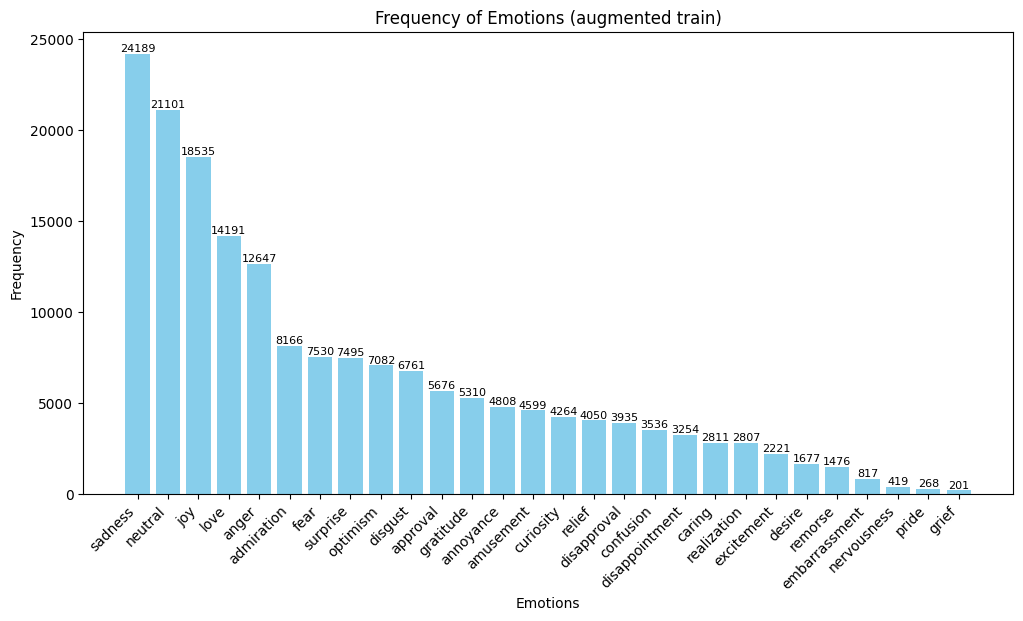

In [19]:
desc_freq = create_freq_dict(augmented_merged, labels, desc=True)
plot_freq(desc_freq, "augmented train")

In [20]:
# convert to huggingface dataset into 3 splits (train/val/test)
def split_convert2hf_dataset(train, val=None, test=None, random_state=1):
    # if train and val passed (no test), val becomes test
    if val is not None and test is None:
        test = val
        val = None

    train_hf_df = Dataset.from_pandas(train)

    # if there's test dataset
    if test is not None:
        test_hf_df = Dataset.from_pandas(test)

    # if there's no validation set
    if val is None:
        # 80% train, 20% test + val
        train_valtest = train_hf_df.train_test_split(test_size=0.2, seed=random_state)

        train_hf_df = train_valtest['train']
        val_hf_df = train_valtest["test"]

        # if no validation and test sets
        if test is None:
            # Split the 20% test + val in half val, half test
            val_test = train_valtest["test"].train_test_split(test_size=0.5, seed=random_state)

            val_hf_df = val_test["train"]
            test_hf_df = val_test["test"]
    else:
        # if val and test datasets provided
        val_hf_df = Dataset.from_pandas(val)
        test_hf_df = Dataset.from_pandas(test)


    return DatasetDict({
    'train': train_hf_df,
    'validation': val_hf_df,
    'test': test_hf_df
    })

In [21]:
# pandas df to hf dataset
augmented_hf = split_convert2hf_dataset(augmented_merged, val_df, test_df, random_state)
augmented_hf

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 150859
    })
    validation: Dataset({
        features: ['text', 'labels'],
        num_rows: 10426
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 12721
    })
})

In [22]:
# function to save hf dataset on disk
def save_hf_dataset(file_path, dataset):
    # only save when file doesn't exist
    if not os.path.exists(file_path):
        dataset.save_to_disk(file_path)
    else:
        print("Dataset already exists.")

In [23]:
file_name = 'augmented_hf_v2'
file_path = f'./datasets/cleaned_hf/{file_name}'
save_hf_dataset(file_path, augmented_hf)

Saving the dataset (0/1 shards):   0%|          | 0/150859 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10426 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/12721 [00:00<?, ? examples/s]